----------------------------  Processing 十五舍  ----------------------------
Preprocessing 十五舍 data......
Reading 十五舍 data......


d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook cont

Reading 十五舍 data finished!


Dispatching 十五舍: 100%|██████████| 97/97 [00:09<00:00, 10.44it/s]


Preprocessing 十五舍 data finished!


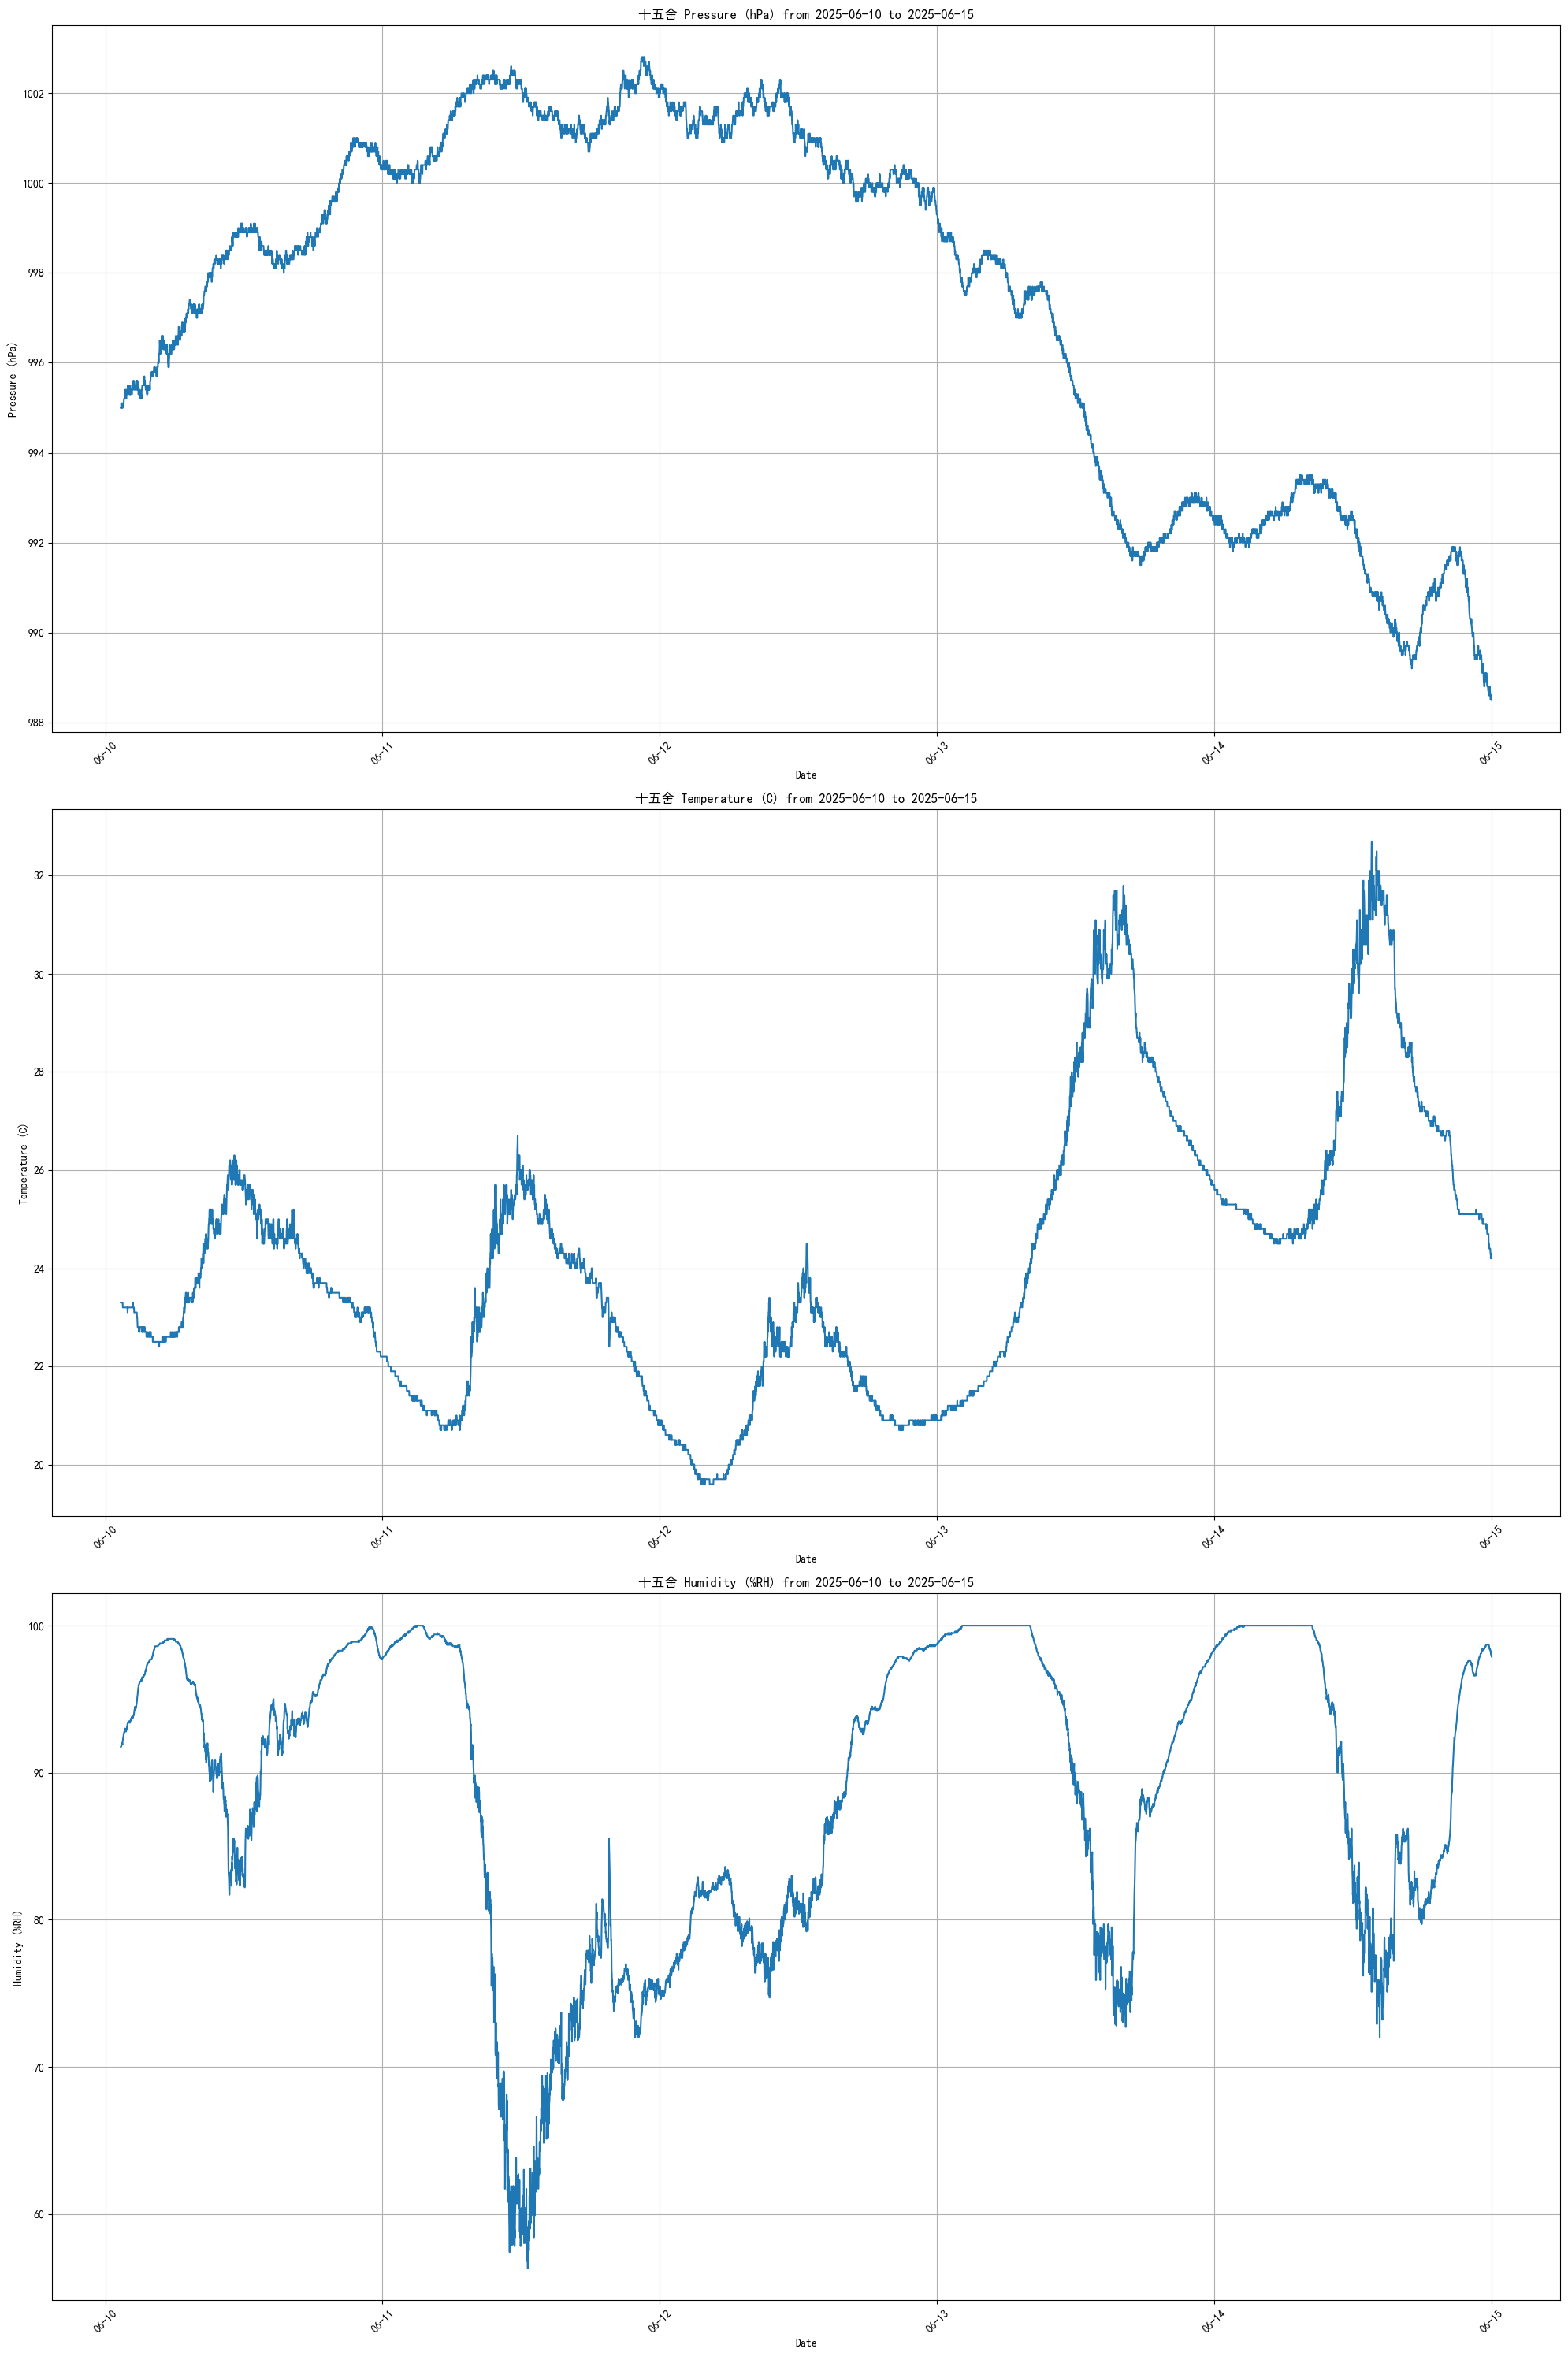

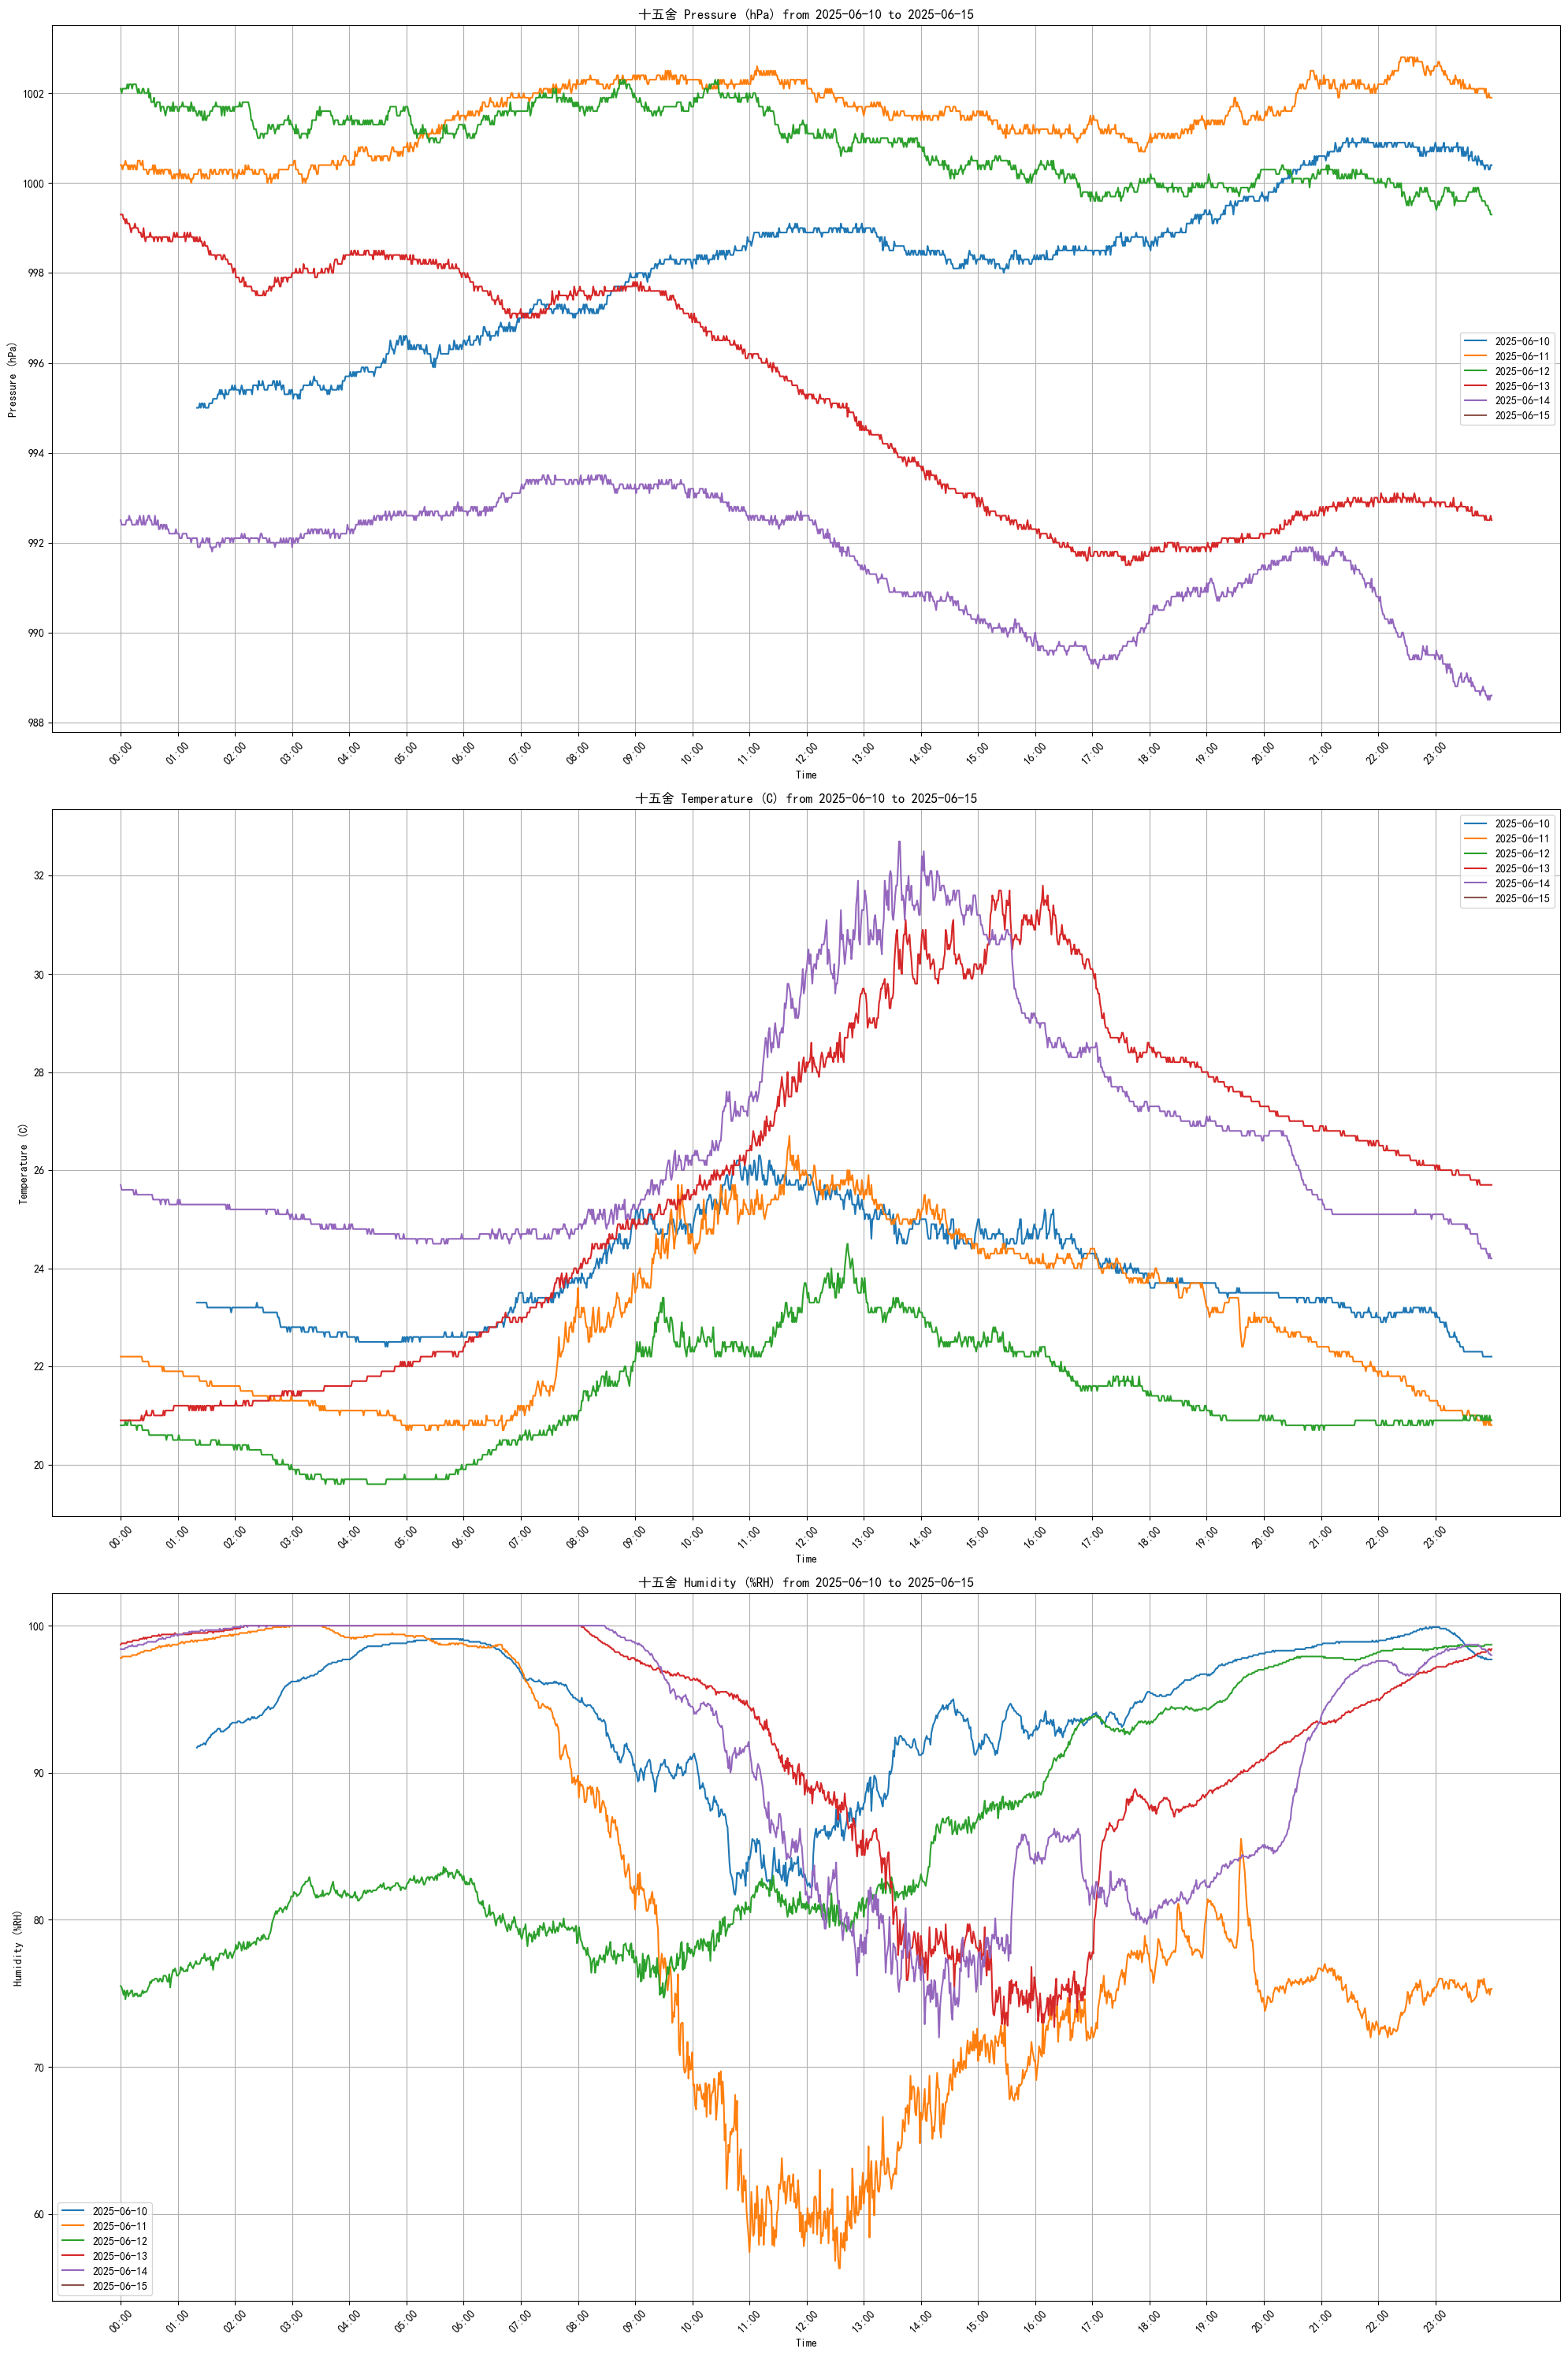

----------------------------  Processing 专教  ----------------------------
Preprocessing 专教 data......
Reading 专教 data......


d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook cont

Reading 专教 data finished!


Dispatching 专教: 100%|██████████| 96/96 [00:14<00:00,  6.69it/s]


Preprocessing 专教 data finished!


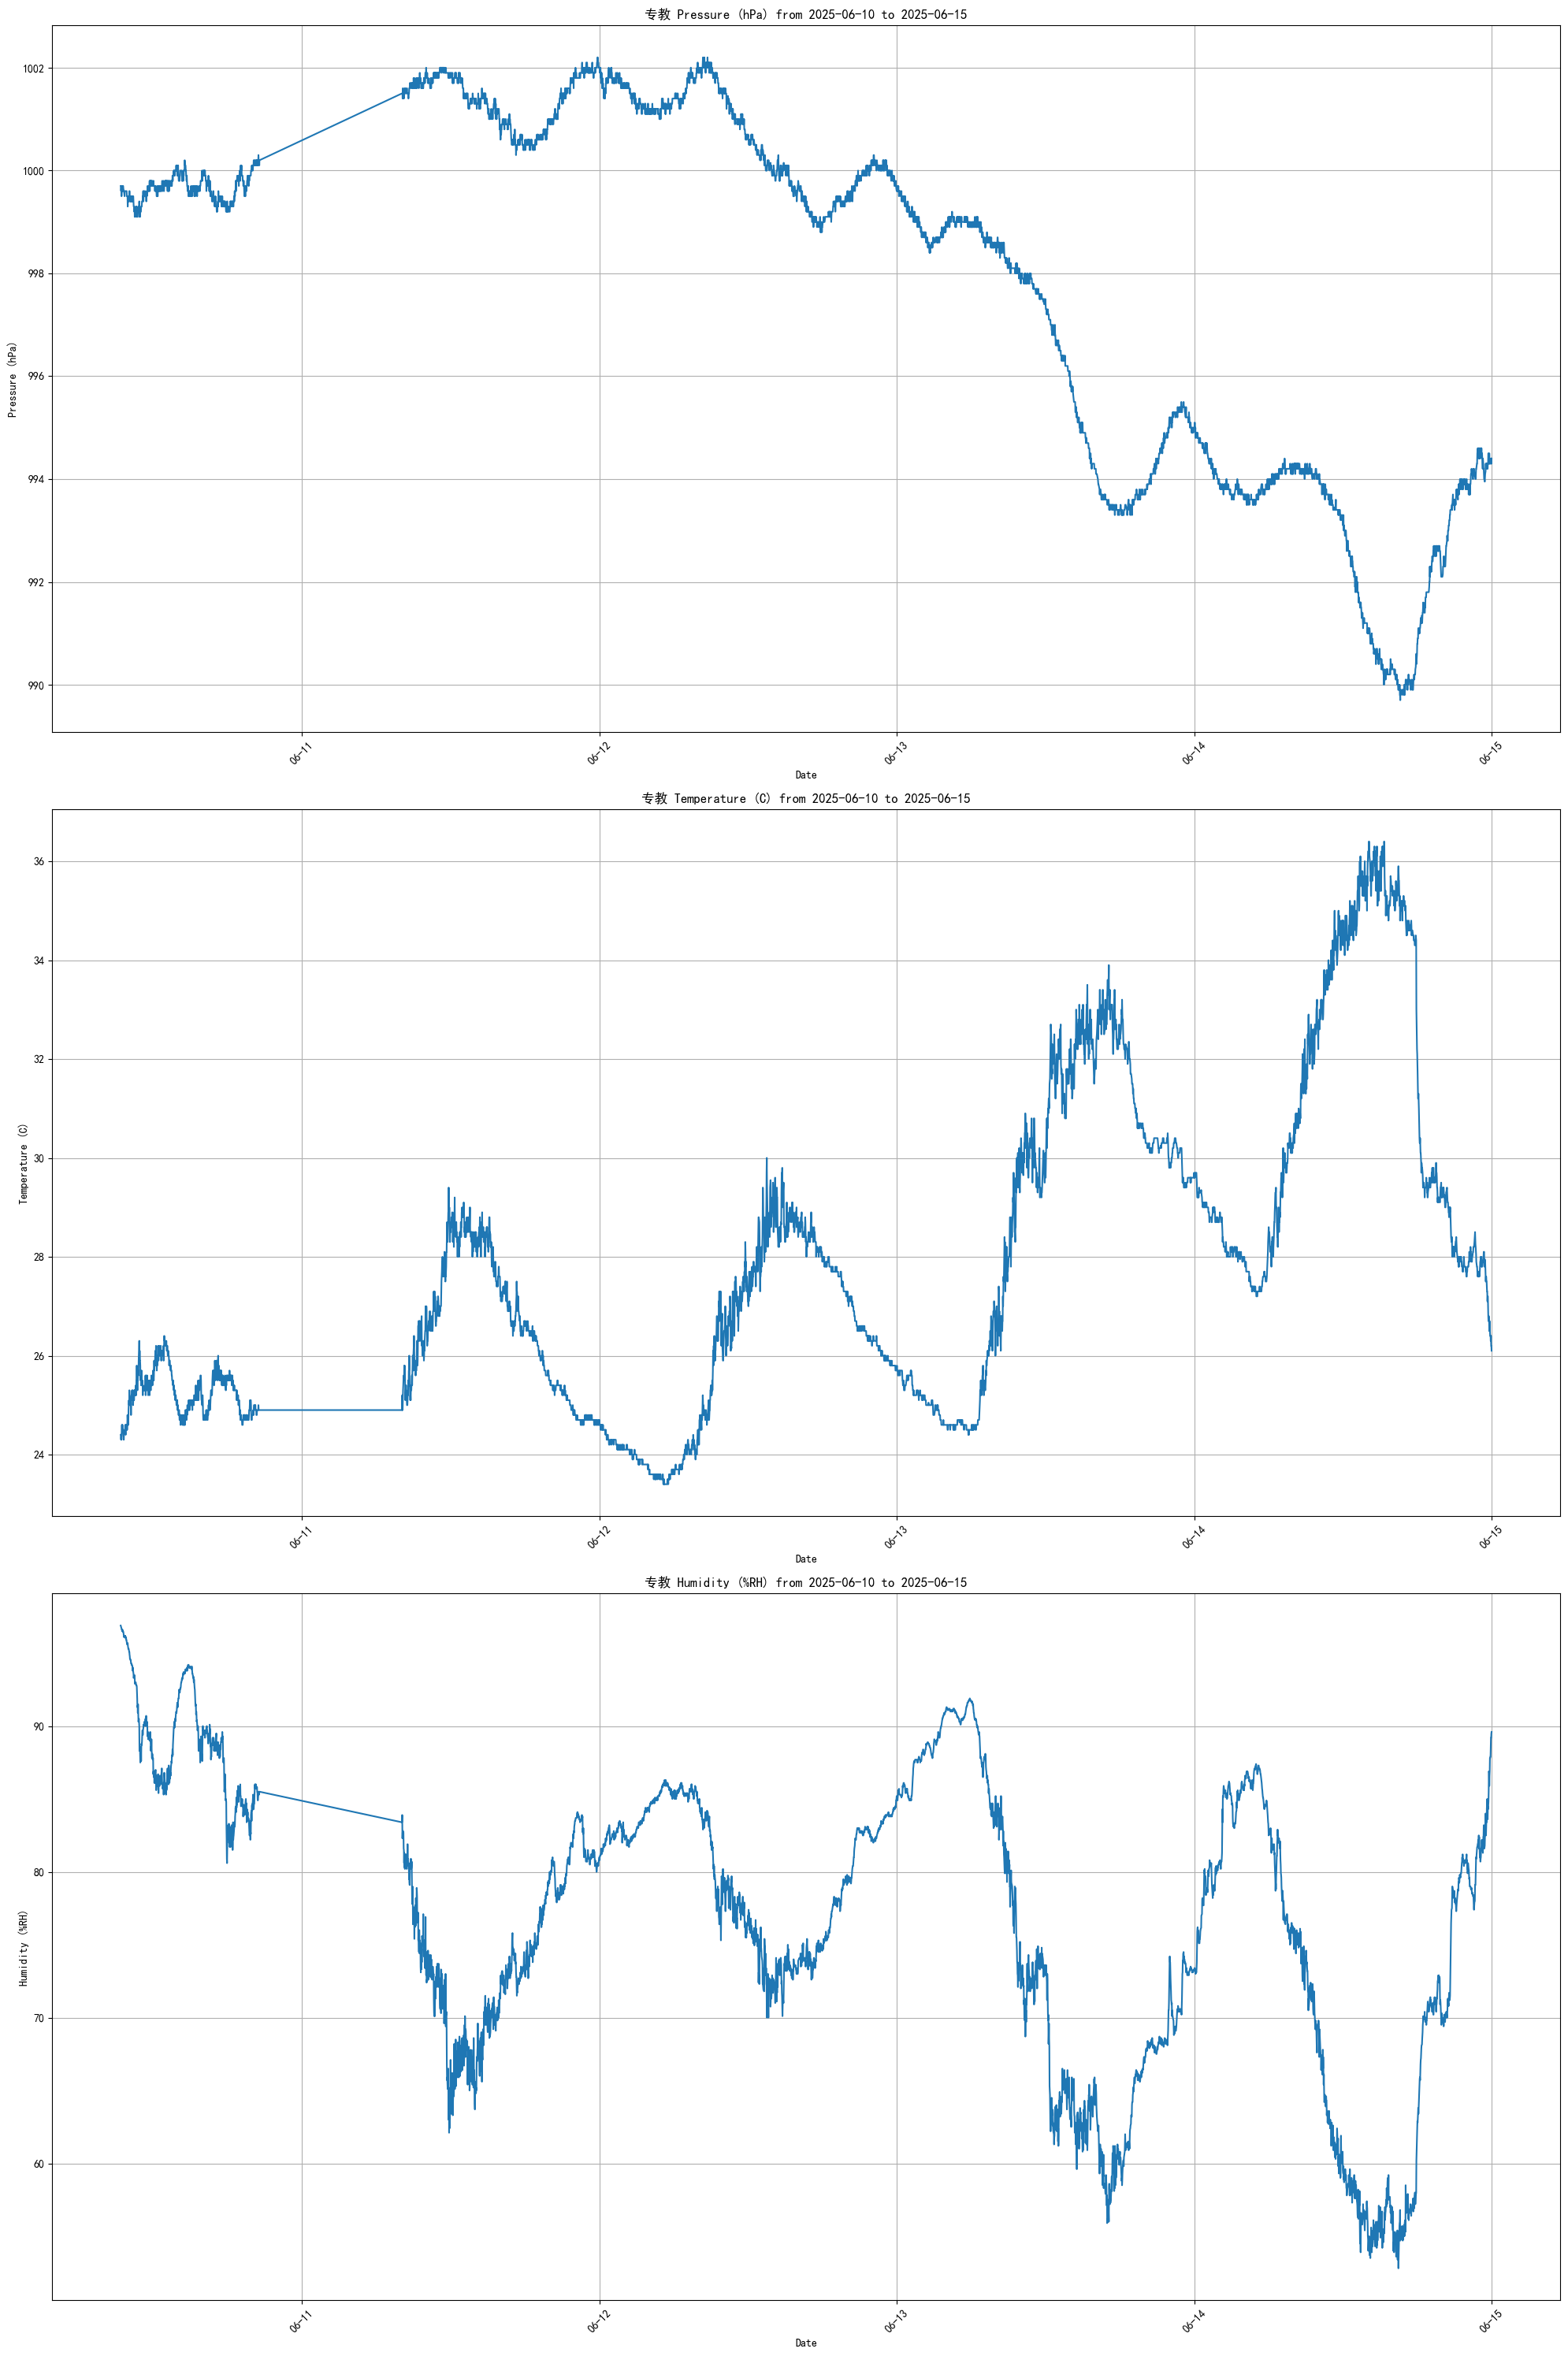

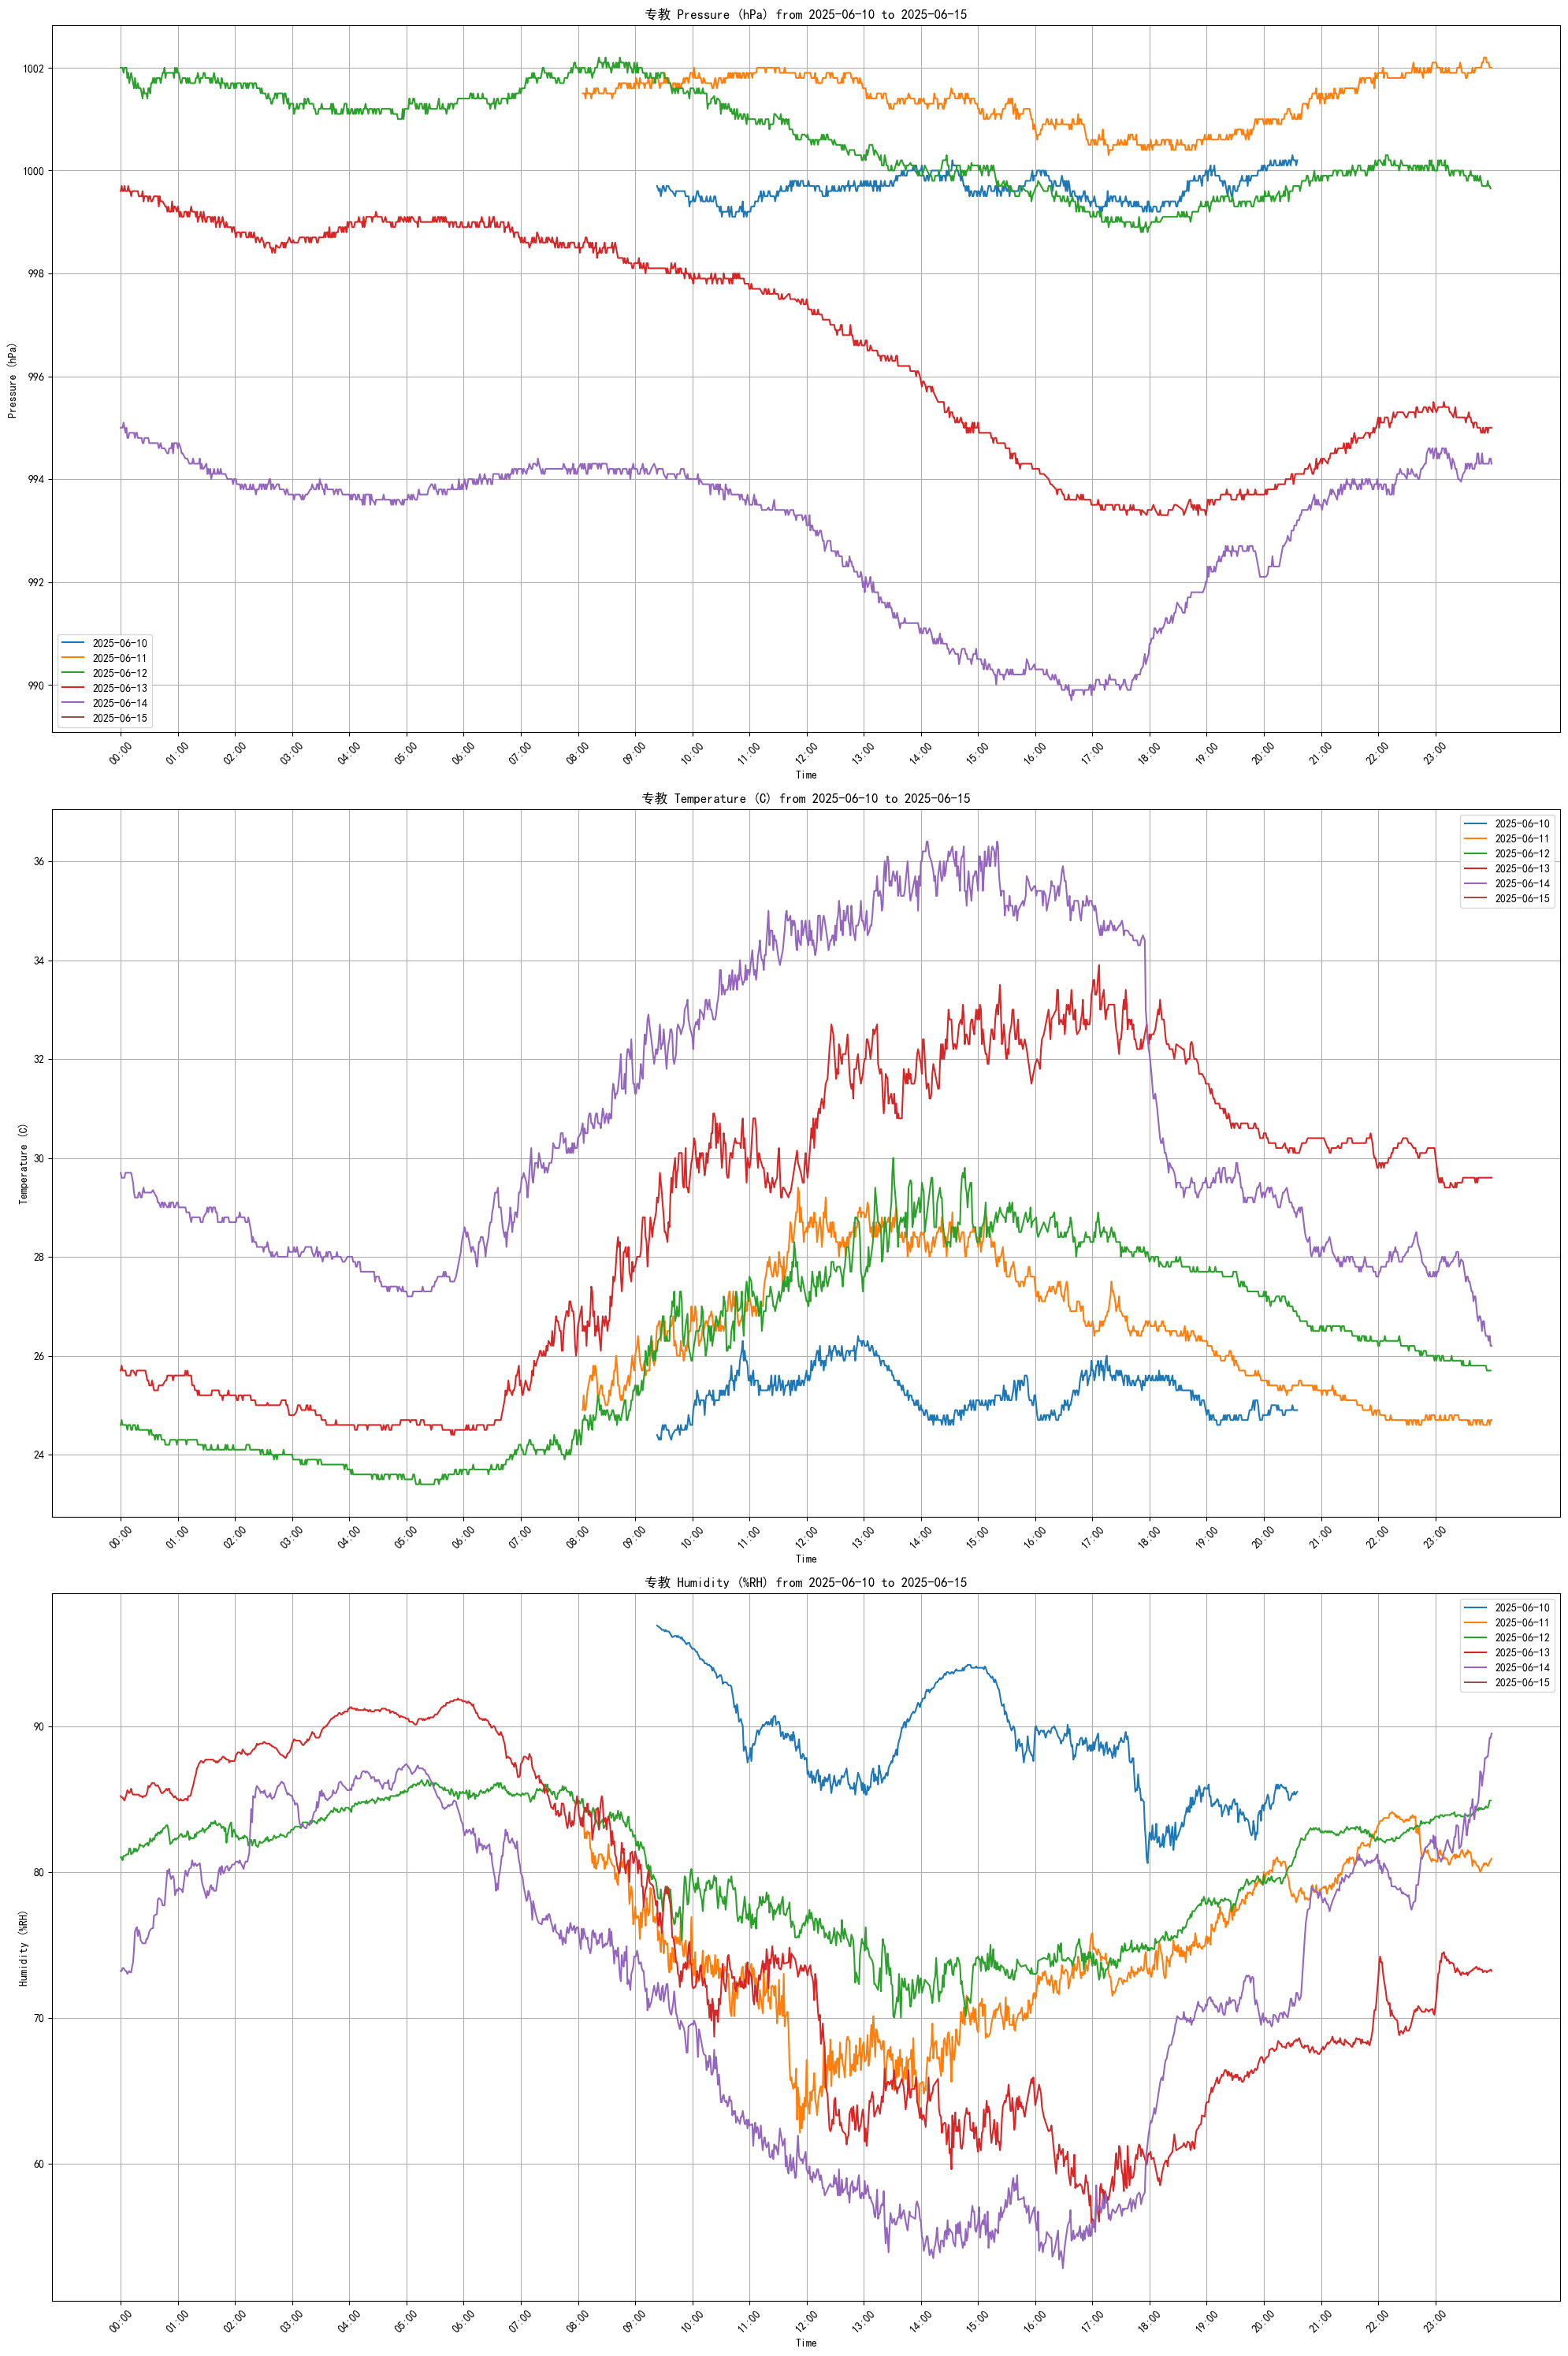

In [4]:
import os
import pandas as pd
from datetime import datetime
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from warnings import filterwarnings
# 忽略警告信息
filterwarnings("ignore")

# 配置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于正确显示负号

def preprocess_data(pre_fix, extracted_raw_data_dir, filtered_data_dir):
    # 读取所有 .xlsx 文件并处理
    excel_files = [f for f in os.listdir(extracted_raw_data_dir) if f.endswith('.xlsx')]   
    raw_df = pd.DataFrame()
    print (f"Reading {pre_fix} data......")
    # Date 的格式为 "%Y-%m-%d %H:%M:%S"
    for file in excel_files:
        file_path = os.path.join(extracted_raw_data_dir, file)
        df = pd.read_excel(file_path)    
        # 确保 Date 列是 datetime 类型
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        # 将时间精确到分钟，去掉秒
        df['Date'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M')
        # 查重，相同的分钟取平均值
        df = df.groupby('Date').mean().reset_index()
        raw_df = pd.concat([raw_df, df], ignore_index=True)

    print (f"Reading {pre_fix} data finished!")

    # 确保 Date 列是 datetime 类型
    raw_df['Date'] = pd.to_datetime(raw_df['Date'], errors='coerce')
    # 查重，删除重复eventTime的行
    raw_df = raw_df.drop_duplicates(subset=['Date'])
    # 按照 Date 中的日期分组，每组数据保存为一个新的 Excel 文件
    for name, group in tqdm(raw_df.groupby(raw_df['Date'].dt.date), desc=f"Dispatching {pre_fix}"):
        file_name = os.path.join(filtered_data_dir, f"{name}.xlsx")
        group = group.sort_values(by='Date')
        # 使用 ExcelWriter 设置编码
        with pd.ExcelWriter(file_name, engine='openpyxl') as writer:
            group.to_excel(writer, index=False)

def visualize_data(filtered_data_dir, pre_fix, visual_start_time, visual_end_time, to_visualize_features_list):
    # 可视化 visual_start_time 到 visual_end_time 之间的数据
    visual_df = pd.DataFrame()
    for file in os.listdir(filtered_data_dir):
        file_path = os.path.join(filtered_data_dir, file)
        df = pd.read_excel(file_path)
        visual_df = pd.concat([visual_df, df], ignore_index=True)
    visual_df['Date'] = pd.to_datetime(visual_df['Date'])
    visual_df = visual_df[(visual_df['Date'] >= visual_start_time) & (visual_df['Date'] <= visual_end_time)]
    
    # 转换特征名称为英文，防止中文显示问题
    feature_mapping = {
        '数字气压(hPa)': 'Pressure (hPa)',
        '大气温度(℃)': 'Temperature (C)',
        '大气湿度(%RH)': 'Humidity (%RH)',
        '超声波风速(m/s)': 'Wind Speed (m/s)',
        '超声波风向(°)': 'Wind Direction (deg)',
        '风速(m/s)': 'Wind Speed (m/s)',
        'PM100(ug/m3)': 'PM100 (ug/m3)',
        'PM2.5(ug/m3)': 'PM2.5 (ug/m3)',
        'PM10(ug/m3)': 'PM10 (ug/m3)',
        'TBQ总辐射(W/m2)': 'Radiation (W/m2)',
        '风向(°)': 'Wind Direction (deg)',
        '日照时数(h)': 'Sunshine Hours (h)',
        '辐射累计(MJ/m2)': 'Accumulated Radiation (MJ/m2)'
    }
    
    if len(visual_df) == 0:
        print(f"No data found between {visual_start_time} and {visual_end_time}")
        return
    
    # 图1：x轴为不同的日期，y轴为各特征值
    fig, axes = plt.subplots(len(to_visualize_features_list), 1, figsize=(20, 10 * len(to_visualize_features_list)))
    if len(to_visualize_features_list) == 1:
        axes = [axes]  # 确保axes始终是列表，即使只有一个子图
        
    for i, feature in enumerate(to_visualize_features_list):
        ax = axes[i]
        visual_df['date'] = visual_df['Date'].dt.date
        sorted_df = visual_df.sort_values(by='Date')
        ax.plot(sorted_df['Date'], sorted_df[feature])
        ax.set_xlabel('Date')
        ax.set_ylabel(feature_mapping.get(feature, feature))
        ax.set_title(f'{pre_fix} {feature_mapping.get(feature, feature)} from {visual_start_time} to {visual_end_time}')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        ax.xaxis.set_major_locator(mdates.DayLocator())
        ax.grid()
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()

    # 图2：x轴为时间点，按日期分组显示
    fig, axes = plt.subplots(len(to_visualize_features_list), 1, figsize=(20, 10 * len(to_visualize_features_list)))
    if len(to_visualize_features_list) == 1:
        axes = [axes]  # 确保axes始终是列表，即使只有一个子图
        
    for i, feature in enumerate(to_visualize_features_list):
        ax = axes[i]
        # 添加额外的时间列用于排序和绘图
        visual_df['hour_minute'] = visual_df['Date'].dt.strftime('%H:%M')
        
        # 按日期分组
        for date, group in visual_df.groupby('date'):
            # 转换时间为分钟数，用于正确绘图
            minutes = pd.to_datetime(group['hour_minute'], format='%H:%M').dt.hour * 60 + pd.to_datetime(group['hour_minute'], format='%H:%M').dt.minute
            ax.plot(minutes, group[feature], label=str(date))
        
        # 设置x轴刻度
        time_ticks = np.arange(0, 24*60, 60)  # 每小时一个刻度
        time_labels = [f"{h//60:02d}:00" for h in time_ticks]
        ax.set_xticks(time_ticks)
        ax.set_xticklabels(time_labels)
        
        ax.set_xlabel('Time')
        ax.set_ylabel(feature_mapping.get(feature, feature))
        ax.set_title(f'{pre_fix} {feature_mapping.get(feature, feature)} from {visual_start_time} to {visual_end_time}')
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.legend()
        ax.grid()
    plt.tight_layout()
    plt.show()


def main(pre_fix, extracted_dir):
    extracted_raw_data_dir = os.path.join(extracted_dir, pre_fix,'Climate_data')
    filtered_data_dir = os.path.join(extracted_dir, pre_fix,'Climate_data', "filtered")
    if not os.path.exists(filtered_data_dir):
        os.makedirs(filtered_data_dir)

    # 预处理数据
    print (f"Preprocessing {pre_fix} data......")
    preprocess_data(pre_fix, extracted_raw_data_dir, filtered_data_dir)
    print (f"Preprocessing {pre_fix} data finished!")

    visual_start_time = '2025-06-10'
    visual_end_time = '2025-06-15'
    
    # all features in prefix '十五舍'：[超声波风速(m/s)	数字气压(hPa)	大气温度(℃)	大气湿度(%RH)	超声波风向(°)]
    # all features in prefix '专教'：[风速(m/s)	数字气压(hPa)	PM100(ug/m3)	大气温度(℃)	大气湿度(%RH)	PM2.5(ug/m3)	PM10(ug/m3)	TBQ总辐射(W/m2)	风向(°)	日照时数(h)	辐射累计(MJ/m2)]
    
    to_visualize_features_list = ['数字气压(hPa)', '大气温度(℃)', '大气湿度(%RH)']

    # 可视化数据
    visualize_data(filtered_data_dir, pre_fix, visual_start_time, visual_end_time, to_visualize_features_list)



if __name__ == "__main__":
    prefix_list = ["十五舍", "专教"]
    extracted_dir = "D:\\Desktop\\Mppt_cur_power"
    for pre_fix in prefix_list:
        print (f"----------------------------  Processing {pre_fix}  ----------------------------")
        main(pre_fix, extracted_dir)